In [1]:
#Importing neccesary prerequisite libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display

#Importing Machine Learning Libraries
from sklearn.preprocessing import LabelEncoder as le
from sklearn.preprocessing import OneHotEncoder as ohe
from sklearn.model_selection import train_test_split as tts

## DATA ANALYSIS

In [2]:
# To label all the bars in the charts

def autolabel(rects,x,y,n):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        axes[n].annotate('{:.0f}'.format(height),xy=(rect.get_x() + rect.get_width() / 2, height),xytext=(x, y),textcoords="offset points",ha='center', va='bottom')
#def autolabel0(rects,x, n):
#    """Attach a text label above each bar in *rects*, displaying its height."""
#    for rect in rects:
#        height = rect.get_height()
#        axes[n].annotate('{:.1f}%'.format(height),xy=(rect.get_x() + rect.get_width() / 2, height),xytext=(x, 3),textcoords="offset points",ha='center', va='bottom')
def autolabel1(rects,x, n):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        axes[n].annotate('{:.0f}'.format(height),xy=(rect.get_x() + rect.get_width() / 2, height),xytext=(x, 1),textcoords="offset points",ha='center', va='bottom')
#def autolabel2(rects,x,y,n):
#    """Attach a text label above each bar in *rects*, displaying its height."""
#    for rect in rects:
#        height = rect.get_height()
#        axes[n].annotate('{:.0f}'.format(height),xy=(rect.get_x() + rect.get_width() / 2, height),xytext=(x, y),textcoords="offset points",ha='center', va='bottom')
        
def autolabel_percent(rects,x,n):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        axes[n].annotate('{:.1f}%'.format(height),xy=(rect.get_x() + rect.get_width() / 2, height),xytext=(x, 3),textcoords="offset points",ha='center', va='bottom')
        
        
# Dataframe to be used only for analysis part
df_train = pd.read_csv("train.csv")
df_train.drop(["Name","Ticket","Fare","Cabin","PassengerId","Embarked"],axis = "columns",inplace = True)
df_train.dropna(inplace=True)

        

    

## 1. Survival Based on Sex Of Passenger

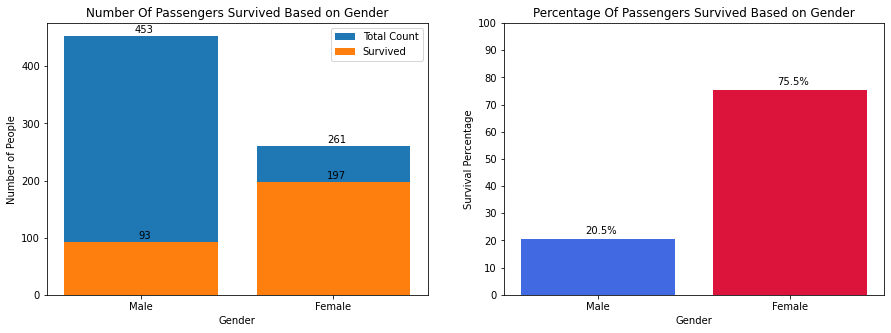

In [3]:
x_sex = df_train["Sex"].unique()
x_sex = [sex.title() for sex in x_sex]
total_male, total_female = df_train["Sex"].value_counts()

male_survived = (df_train.loc[(df_train["Sex"] == "male") & (df_train["Survived"] == 1)]).shape[0]
female_survived = (df_train.loc[(df_train["Sex"] == "female") & (df_train["Survived"] == 1)]).shape[0]
sexwise_survied = [male_survived, female_survived]
percent_survived = [(sexwise_survied[0]/total_male*100),(sexwise_survied[1]/total_female*100)] 

#Visualisation
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

axes[0].set_title("Number Of Passengers Survived Based on Gender")
axes[0].set_xlabel("Gender")
axes[0].set_ylabel("Number of People")
barplot1 = axes[0].bar(x_sex,[total_male,total_female],label = "Total Count")
barplot2 = axes[0].bar(x_sex,sexwise_survied,label = "Survived")

axes[1].set_title("Percentage Of Passengers Survived Based on Gender")
axes[1].set_xlabel("Gender")
axes[1].set_ylabel("Survival Percentage")
barplot3 = axes[1].bar(x_sex,percent_survived,color = ["royalblue","crimson"])
axes[1].set_yticks(range(0,101,10))
axes[0].legend(loc = "upper right")

autolabel1(barplot1,3,0)
autolabel1(barplot2,3,0)
autolabel_percent(barplot3,3, 1)
plt.show()

#### From the above analysis, we may conclude that,
**1. Females had a better survival chance than males.**

## 2. Survival Based on Passenger Class


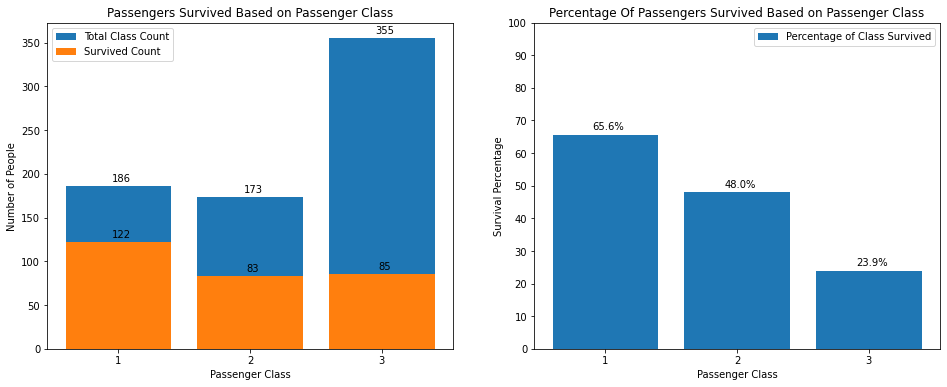

From the above analysis, we can say that
1. The chances of survival of Class 1 are maximum, which is 65.6%
2. Tho Class 3 passengers are maximum in number, their survival chances are the least i.e. 23.9%



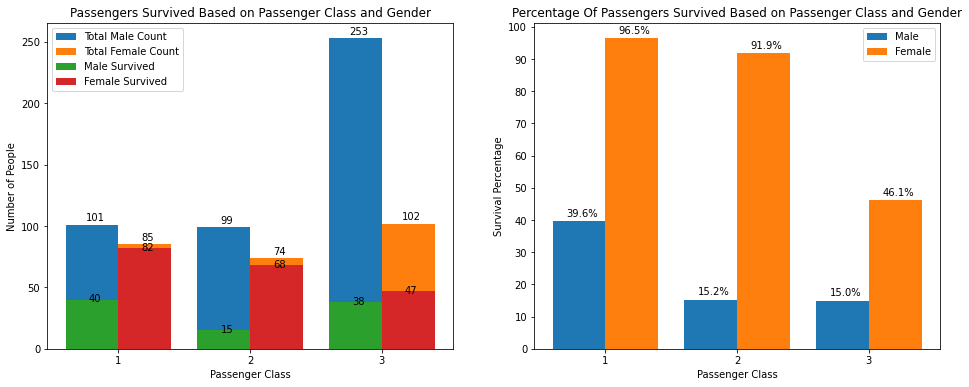

In [4]:
classwise_males,classwise_females,classwise_females_surv,classwise_males_surv = [],[],[],[]
classwise_percent_male_survived,classwise_percent_female_survived,classwise_survived,classwise_surv_per = [],[],[],[]
df_class = df_train.sort_values(by = "Pclass")
x_class = (df_class["Pclass"].unique())

x_sex = df_class["Sex"].unique()
x_sex = [sex.title() for sex in x_sex]
class3_total,class1_total,class2_total = df_class["Pclass"].value_counts()
classwise_total = [class1_total,class2_total,class3_total]

df_new = df_class.set_index("Pclass")

#To get total number and survived number of males and females acc to class
for num in range(1,4):
    classwise_males.append((df_new.loc[(df_new.index == num) & (df_new["Sex"] == "male")]).shape[0])
    classwise_females.append((df_new.loc[(df_new.index == num) & (df_new["Sex"] == "female")]).shape[0])
    classwise_males_surv.append((df_new.loc[(df_new.index == num) & (df_new["Sex"] == "male") & df_new["Survived"] == 1]).shape[0])
    classwise_females_surv.append((df_new.loc[(df_new.index == num) & (df_new["Sex"] == "female")& df_new["Survived"] == 1]).shape[0])
#To get percentage of survived number of males and females acc to class
    classwise_percent_male_survived.append(round(classwise_males_surv[-1]/classwise_males[-1]*100,1))
    classwise_percent_female_survived.append(round(classwise_females_surv[-1]/classwise_females[-1]*100,1))

#To get survived number of people acc to passenger class
for num in range(1,4):
    classwise_survived.append((df_new.loc[(df_new.index == num) & df_new["Survived"] == 1]).shape[0])
    classwise_surv_per.append(round(classwise_survived[-1]/classwise_total[num-1]*100,1))

#Visualisation
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (16,6))

axes[0].set_title("Passengers Survived Based on Passenger Class")
axes[0].set_xlabel("Passenger Class")
axes[0].set_ylabel("Number of People")
count_bar_tot = axes[0].bar(x_class,classwise_total,label = "Total Class Count")
count_bar_sur = axes[0].bar(x_class,classwise_survived,label = "Survived Count")
axes[0].set_xticks(range(1,4,1))
axes[0].legend()

axes[1].set_title("Percentage Of Passengers Survived Based on Passenger Class")
axes[1].set_xlabel("Passenger Class")
axes[1].set_ylabel("Survival Percentage")
percent_bar = axes[1].bar(x_class,classwise_surv_per,label="Percentage of Class Survived")
axes[1].set_yticks(range(0,101,10))
axes[1].set_xticks(range(1,4,1))
axes[1].legend()

autolabel(count_bar_tot,3,3,0)
autolabel(count_bar_sur,3,3,0)
autolabel_percent(percent_bar,3,1)
plt.show()

print("""From the above analysis, we can say that
1. The chances of survival of Class 1 are maximum, which is {:.1f}%
2. Tho Class 3 passengers are maximum in number, their survival chances are the least i.e. {:.1f}%\n"""
     .format(max(classwise_surv_per),min(classwise_surv_per)))

fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (16,6))

axes[0].set_title("Passengers Survived Based on Passenger Class and Gender")
axes[0].set_xlabel("Passenger Class")
axes[0].set_ylabel("Number of People")
male_to = axes[0].bar(x_class-0.2,classwise_males,width=0.4,label = "Total Male Count")
female_to = axes[0].bar(x_class+0.2,classwise_females,width=0.4,label = "Total Female Count")
male_su = axes[0].bar(x_class-0.2,classwise_males_surv,width=0.4,label = "Male Survived")
female_su = axes[0].bar(x_class+0.2,classwise_females_surv,width=0.4,label = "Female Survived")
axes[0].set_xticks(range(1,4,1))
axes[0].legend(loc = "upper left")


axes[1].set_title("Percentage Of Passengers Survived Based on Passenger Class and Gender")
axes[1].set_xlabel("Passenger Class")
axes[1].set_ylabel("Survival Percentage")
male_bar = axes[1].bar(x_class-0.2,classwise_percent_male_survived,width=0.4,label = "Male")
female_bar = axes[1].bar(x_class+0.2,classwise_percent_female_survived,width=0.4,label = "Female")
axes[1].set_yticks(range(0,101,10))
axes[1].set_xticks(range(1,4,1))
axes[1].legend()



autolabel(male_su,3,-4,0)
autolabel(female_su,3,-4,0)
autolabel(male_to,3,2,0)
autolabel(female_to,3,2,0)
autolabel_percent(male_bar,3,1)
autolabel_percent(female_bar,3,1)
plt.show()

#### From the above we can conclude that,
**1. Chances of survival of passengers of Class 1 is greater than Class 2, while Class 3 passengers have least survival percentage.**</br>
**2. The chances of survival of females is far more greater than males.**

## 3. Survival Based on Age of Passenger

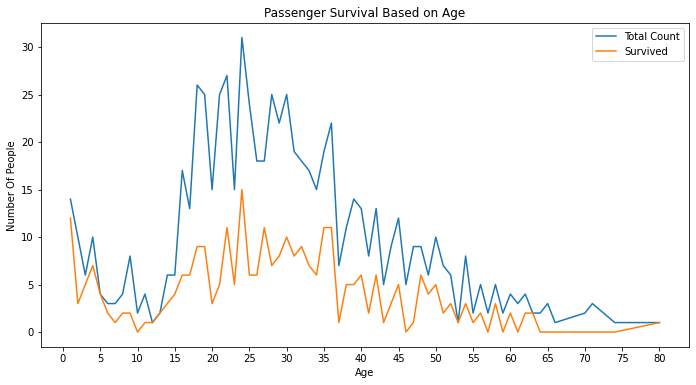

,0,1,2,3,4
Age Group,0-16,16-32,32-48,48-64,64-80
Percentage Survived,55.0%,37.0%,40.4%,43.5%,9.1%


In [5]:
df_age = df_train.sort_values(by = ["Age"])

age_lst,agewise_totalcount, agewise_survived, age_rangewise_totalcount, age_rangewise_survived, agewise_range_percent = [], [], [], [], [], []
age_lst = df_age["Age"].apply(np.ceil)
df_age["age"] = age_lst
age_lst = age_lst.unique()
#print(agewise.unique())
#df_age.set_index("Age", inplace = True)
for age in age_lst:
    agewise_survived.append((df_age.loc[(df_age["age"] == age) & (df_age["Survived"] == 1)]).shape[0])
    agewise_totalcount.append(df_age.loc[(df_age["age"] == age)].shape[0])
#print(age_lst)
#print(agewise_totalcount)
#print(agewise_survived)

fig = plt.figure(figsize = (10,5))
axes = fig.add_axes([0.9,0.9,0.9,0.9])
axes.plot(age_lst,agewise_totalcount, label = "Total Count")
axes.plot(age_lst,agewise_survived, label = "Survived")
plt.title("Passenger Survival Based on Age")
plt.xlabel("Age")
plt.ylabel("Number Of People")
plt.legend(loc = "upper right")
plt.xticks(range(0,85,5))
plt.show()

ages_lst = [];i = 0
age_range_lst = [element for element in range(0,81,16)]
for age in age_range_lst[1:]:
    age_rangewise_survived.append((df_age.loc[(df_age["age"] > i) & (df_age["age"] <= age) & (df_age["Survived"] == 1)]).shape[0])
    age_rangewise_totalcount.append(df_age.loc[(df_age["age"] > i) & (df_age["age"] <= age)].shape[0])
    agewise_range_percent.append(age_rangewise_survived[-1]/age_rangewise_totalcount[-1]*100)
    ages_lst.append(("{}-{}".format(i,age)))
    i = age
agewise_range_percent = [str(round(element,1))+"%" for element in agewise_range_percent]
df_percent = pd.DataFrame(zip(ages_lst,agewise_range_percent),columns = ["Age Group","Percentage Survived"]).T
display(df_percent)

#### From the above graph, we can draw the following conclusions,
**1. For the age group 0-16, the survival rate is high.**</br>
**2. For the age group 16-32 the survival rate is low.**</br>
**3. For the age group 32-64, the survival rate is moderate.**</br>
**4. For the age group 64-80, the survival rate is very low.**</br>

## 4. Survival Based on Siblings and Spouse Count

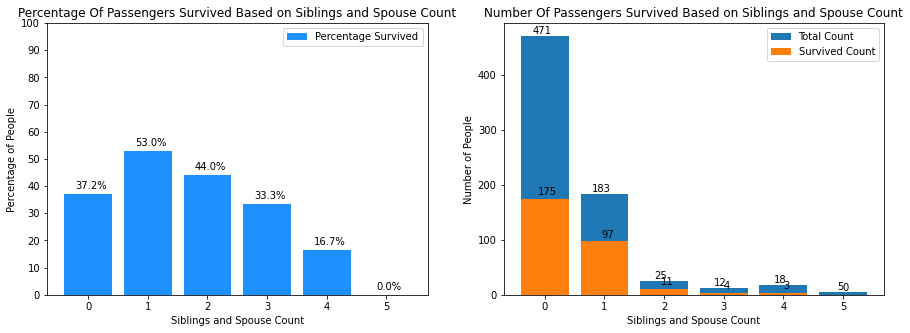

In [6]:

total_count, survived_count, percent_survived = [], [], []

df_sib = df_train.sort_values(by = ["SibSp"])
df_sib.drop(["Age", "Pclass", "Sex", "Parch"], axis = 1, inplace = True)
x_sib = df_sib["SibSp"].unique()

for sibsp in x_sib:
    total_count.append((df_sib.loc[df_sib["SibSp"] == sibsp]).shape[0])
    survived_count.append((df_sib.loc[(df_sib["SibSp"] == sibsp) & (df_sib["Survived"] == 1)]).shape[0])
    percent_survived.append(survived_count[-1]/total_count[-1]*100) 

fig, axes = plt.subplots(nrows = 1, ncols =2, figsize = (15,5))

axes[0].set_title("Percentage Of Passengers Survived Based on Siblings and Spouse Count")
axes[0].set_xlabel("Siblings and Spouse Count")
axes[0].set_ylabel("Percentage of People")
plot1 = axes[0].bar(x_sib,percent_survived, label = "Percentage Survived", color = "dodgerblue")
axes[0].set_yticks(range(0,101,10))
axes[0].legend(loc = "upper right")

axes[1].set_title("Number Of Passengers Survived Based on Siblings and Spouse Count")
axes[1].set_xlabel("Siblings and Spouse Count")
axes[1].set_ylabel("Number of People")
plot2 = axes[1].bar(x_sib,total_count, label = "Total Count")
plot3 = axes[1].bar(x_sib, survived_count, label = "Survived Count")
axes[1].legend(loc = "upper right")

autolabel_percent(plot1, 3, 0)
autolabel(plot2,-3, 0, 1)
autolabel(plot3,3, 2, 1)
plt.show()

#### From the above. we may say that,
**1. The Siblings and Spouse Count does not show any significant impact on Survival of Passengers.**</br>
**2. However, it will be considered in the model.**

## 5. Survival Based on Children and Parent Count

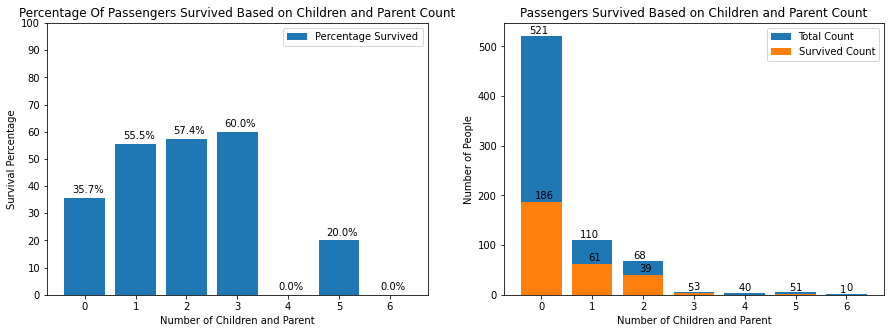

In [7]:
total_count, survived_count, percent_survived = [], [], []

df_parch = df_train.sort_values(by = ["Parch"])
df_parch.drop(["Age", "Pclass", "Sex", "SibSp"], axis = 1, inplace = True)
x_parch = df_parch["Parch"].unique()

for parch in x_parch:
    total_count.append((df_parch.loc[df_parch["Parch"] == parch]).shape[0])
    survived_count.append((df_parch.loc[(df_parch["Parch"] == parch) & (df_parch["Survived"] == 1)]).shape[0])
    percent_survived.append(survived_count[-1]/total_count[-1]*100) 

fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

axes[0].set_title("Percentage Of Passengers Survived Based on Children and Parent Count")
axes[0].set_xlabel("Number of Children and Parent")
axes[0].set_ylabel("Survival Percentage")
plot1 = axes[0].bar(x_parch,percent_survived, label = "Percentage Survived")
axes[0].set_yticks(range(0,101,10))
axes[0].legend()

axes[1].set_title("Passengers Survived Based on Children and Parent Count")
axes[1].set_xlabel("Number of Children and Parent")
axes[1].set_ylabel("Number of People")
plot2 = axes[1].bar(x_parch,total_count, label = "Total Count")
plot3 = axes[1].bar(x_parch, survived_count, label = "Survived Count")
axes[1].legend(loc = "upper right")

autolabel_percent(plot1, 3, 0)
autolabel(plot2,-3, 0, 1)
autolabel(plot3,3, 2, 1)
plt.show()

#### From the above. we may say that,
**1. The Children and Parent Count does not show any significant impact on Survival of Passengers.**</br>
**2. However, it will be considered for the model.** 

# CONCLUSION FROM ANALYSIS OF DATASET


*From all of the above analysis, we can conclude that a passenger has the maximum probability of survival if:*</br>
**1. That person is a female** </br>
**2. If he/she is a First Class Passenger**</br>
**3. Is aged between 0-16 or 48-64** *</br>

#### Having successfully completed the Analysis part of the Dataset, we now move to the Machine Learning Model Preparation.

## MODEL PREPARATION

In [8]:
#Preprocessing of Data/ Data Wrangling : 
#1. Data Integration
#2. Data Cleaning
#3. Data Reduction
#4. Data Transformation

def data_preprocessing():    
    
    #Data Integration
    df_train = pd.read_csv("train.csv")
    df_test = pd.read_csv("test.csv")

    df_train["Train_data"] = 1
    df_test["Train_data"] = 0

    df = pd.concat([df_train, df_test], axis = 0)
    df = df.reset_index()

    #Data Cleaning
    
    #To care care of NaN values 
    #print(df.isna().sum()) 
    #It gives output: Survived       418, Age            263

    df["Survived"].fillna(0, inplace = True)
    df["Age"].fillna(np.mean(df["Age"]), inplace = True)

    #Data Transformation - 1
    
    # Converting Categorical Values into One hot encoded columns.
    df["Sex_cat"], df["Pclass_cat"] = le().fit_transform(df["Sex"]), le().fit_transform(df["Pclass"])
    df["Parch_cat"], df["SibSp_cat"] = le().fit_transform(df["Parch"]), le().fit_transform(df["SibSp"])

    df_gender = pd.DataFrame(ohe(handle_unknown = 'ignore').fit_transform(df[['Sex_cat']]).toarray())
    df_gender.rename(columns = {0:"Female", 1:"Male"}, inplace = True)
    df_class = pd.DataFrame(ohe(handle_unknown = 'ignore').fit_transform(df[['Pclass_cat']]).toarray())
    df_class.rename(columns = {0:"Class 1", 1:"Class 2", 2:"Class 3"}, inplace = True)
    
    df_parch = pd.DataFrame(ohe(handle_unknown = 'ignore').fit_transform(df[['Parch_cat']]).toarray())
    df_parch.rename(columns = {col:'Parch-{}'.format(str(col)) for col in df["Parch_cat"].values}, inplace = True)
    df_sibsp = pd.DataFrame(ohe(handle_unknown = 'ignore').fit_transform(df[['SibSp_cat']]).toarray())
    df_sibsp.rename(columns = {col:'SibSp-{}'.format(str(col)) for col in df["SibSp_cat"].values}, inplace = True)
    
    #df = pd.concat([df, df_gender, df_class], axis = 1)
    df = pd.concat([df, df_gender, df_class,df_parch,df_sibsp], axis = 1)
    
    
    #Data Reduction
    
    #Removing unnecesary columns from train and test dataset
    df = df.drop(['Name',"Ticket", "Fare", "Embarked", "Cabin"], axis = 1, errors = 'ignore')
    df.drop(["index","Sex","Sex_cat", "Pclass_cat","Sex","Pclass","Parch","SibSp","Parch_cat","SibSp_cat"], axis = 1, inplace = True, errors = 'ignore')

    #Data Transformation - 2
    
    #Applying Mean Normalisation on the Data
    df_norm = df.copy()
    norm_cols = ["Age"]
    for col in norm_cols:
        df_norm[col] = (df[col] - np.mean(df[col]))/(np.max(df[col]) - np.min(df[col]))

    #Splitting Train and Test Set
    df_train = df_norm.loc[df_norm["Train_data"] == 1].copy()
    df_test = df_norm.loc[ df_norm["Train_data"] == 0].copy()
    df_train.drop(["Train_data"], inplace = True, axis = 1, errors = 'ignore')
    df_test.drop(["Train_data"], inplace = True, axis = 1, errors = 'ignore')
    df_train.set_index(["PassengerId"], inplace = True)
    df_test.set_index(["PassengerId"], inplace = True) 
    return (df_train,df_test)


### After Cleaning the dataset, we now have :
1. PassengerId (index)
2. Age (Mean Normalised)
3. Sex, Pclass, Parch, SibSp (cat->ohe)

#### These features increase the accuracy of model.

In [9]:
#Helper Functions to Model Preperation

# Learning rate alpha decay to reduce the value of alpha per epoch/ complete iteration    
def learning_rate_decay(alpha, iter_num):
    if iter_num % 20 == 0:
        alpha = (1/(1+iter_num)) * alpha;
    return alpha;

# To Split dataset into train and Test Sets. Not implemented cross val since dataset is very small.
def TrainTestSplit(X, y):
    X_train, X_test, y_train, y_test = tts(X, y, test_size = 0.25, random_state = 7);
    return X_train, X_test, y_train, y_test
    
# To get an analysis of the data and my model performance
def confusionMatrix(X, theta, y, val):
    
    tp, tn, fp, fn = 0, 0, 0, 0
    h = sigmoid(np.dot(X, theta))
    h[h >= val], h[h < val] = 1, 0                #val = 0.3
    for i in range(0,len(h)):
        if(h[i] == 1 and y[i] == 1): tp = (tp+1) 
        if(h[i] == 0 and y[i] == 0): tn = (tn+1) 
        if(h[i] == 1 and y[i] == 0): fp = (fp+1) 
        if(h[i] == 0 and y[i] == 1): fn = (fn+1)
    print("TP = ",tp,"\t FP = ",fp,"\t\t Correct Predictions   (TP+TN) = ",(tp+tn))
    print("FN = ",fn,"\t TN = ",tn,"\t\t Incorrect Predictions (FP+FN) = ",(fn+fp))
    print("""
    1.Accuracy  = %.2f 
    2.F1 Score  = %.2f 
    3.Precision = %.2f 
    4.Recall    = %.2f """ % ( (((tp+tn)*100) / (tp+tn+fp+fn)),
                              ((tp*100) / (tp + (0.5*(fp+fn)))),
                              ((tp*100) / (tp + fp)), 
                              ((tp*100) / (tp + fn)) ))
    
def predict(X, theta, y):
   
    accuracy = 0;
    z = np.dot(X, theta);
    h = 1 / (1 + np.exp(-z));
    h[h >= 0.3] = 1
    h[h < 0.3] = 0
    
    for i in range(len(h)):
        if h[i] == y[i]:
            accuracy += 1;
    accuracy = accuracy / len(h);
    print("Accuracy : ",accuracy);


In [10]:
from sklearn.metrics import confusion_matrix
from IPython.display import display
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor

score_lst, conf_mat_lst = [], []
models = ["Linear Regression", "Logistic Regression", "Select Vector Machines [rbf, C=20]", "Select Vector Machines [rbf, C=10]", "Random Forest Classifier", "Decision Tree Regressor"]
model_lst = [LinearRegression(),LogisticRegression(), SVC(gamma = "auto",C =20,kernel="rbf"),SVC(gamma = "auto",C =10,kernel="rbf"),RandomForestClassifier(n_estimators = 10),DecisionTreeRegressor(criterion = "squared_error")]

df_train, df_test = data_preprocessing()

#Creating dataframes of Input and Output Features
X_df = df_train.drop(["Survived"], axis = 1)       #891 * 21            
y_df = df_train["Survived"]                        #891 * 1

#Extracting values of Input features and Output features as Numpy Arrays
x = (X_df).values                                  #891 * 21
y = (y_df).values.reshape(1, len((y_df).values))   #891 * 1

# Adding a Bias Feature to X
x = np.c_[np.ones((x.shape[0], 1)), x]
y = y.ravel()
x_train, x_test, y_train, y_test = TrainTestSplit(x, y.T)

for mdl_name in model_lst:
    model = mdl_name
    model.fit(x_train,y_train)
    score_lst.append(model.score(x_test, y_test))
    try:
        y_pred = model.predict(x_test)
        tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
        conf_mat = [[tn,fp],[fn,tp]]
        conf_mat_lst.append(conf_mat)
    except ValueError:
        conf_mat_lst.append("NA")
        
df_models = pd.DataFrame(zip(models,score_lst), columns = ["Model Name","Accuracy"])
df_models["Confusion Matrix"] = conf_mat_lst
df_models.sort_values(by = "Accuracy", ascending = False, inplace = True)
df_models.reset_index(inplace = True)
df_models.drop("index",axis = 1, inplace = True)
display(df_models)

,Model Name,Accuracy,Confusion Matrix
0,Logistic Regression,0.757848,"[[115, 20], [34, 54]]"
1,Random Forest Classifier,0.757848,"[[116, 19], [35, 53]]"
2,"Select Vector Machines [rbf, C=20]",0.753363,"[[115, 20], [35, 53]]"
3,"Select Vector Machines [rbf, C=10]",0.748879,"[[115, 20], [36, 52]]"
4,Linear Regression,0.256968,NA
5,Decision Tree Regressor,0.082960,NA


### Logistic Regression Model for Classification

In [11]:
#LOGISTIC REGRESSION MODEL

def softmax(h):
        y_pred = []
        for element in h:
                if element > 0.4:
                        y_pred.append(1)
                else:
                        y_pred.append(0)
        return y_pred

#To print Sigmoid Function
def sigmoid(z):
        sig = 1 / (1 + np.exp(-z)); 
        return sig

# Predicting output based on X and Theta
def hypo_y(X, theta):
        t = np.dot(X, theta)
        h = sigmoid(t)
        return h      
    
# To get the Loss Function J    
def costFunction(X, theta, y, m, lambd):
        h = hypo_y(X, theta);
        J_reg = (-1/m) * np.sum((y*np.log(h)) + (1 - y)*np.log(1 - h)) + lambd * np.sum(np.square(theta));
        return J_reg    

#Stochastic Gradient Descent to tune the parameter theta
def GradDescent(theta, alpha, m, X, y, num_iter, lambd):
        cache = []
        costf_values, theta_values = [], []
        h = hypo_y(X, theta);
        for n in range(0, num_iter):
            
            #Learning Rate Decay
            alpha = learning_rate_decay(alpha, n);
            
            theta = theta - ((alpha/m) * np.dot(X.T, (h - y)) + ( ((alpha*lambd) / m) * theta))
            J_val = costFunction(X, theta, y, m, lambd);
            
            
            #if(J_val > costf_values[n-1]):
            #    print("Cost Function J after ",n," iterations : ",J_val);
            #    cache["CostFunction"] = costf_values
            #    return theta, cache
            if(n%50 == 0):
                print("Cost Function J after ",n," iterations : ",J_val);
            cache.append([J_val, theta])
        
        return theta, cache

# Implementation of Logistic Regression with sigmoid function    
def LogisticRegression(X, y, m, n, alpha, num_iter, lambd, theta):   
    
    #To get prediction made by model h(Theta)
    h = hypo_y(X, theta);                 

    #Cost Function J
    J = costFunction(X, theta, y, m, lambd);
    
    #Defining gradient Descent to tune theta      
    J_init = costFunction(X, theta, y, m, lambd);
  
    print("\nRunning Gradient Descent with Lambda = ", lambd,", alpha = ",alpha," and Number of Iterations : ",num_iter);
    theta, cache = GradDescent(theta, alpha, m, X, y, num_iter, lambd);
    J_final = costFunction(X, theta, y, m, lambd);
    print("\nThe Cost Function of Train Set after applying Gradient Descent is : ",J_final);
    
    return theta, cache
    

### Model Implementation

In [12]:
df_train, df_test = data_preprocessing()

#Creating dataframes of Input and Output Features
X_df = df_train.drop(["Survived"], axis = 1)       #891 * 21            
y_df = df_train["Survived"]                        #891 * 1

#Extracting values of Input features and Output features as Numpy Arrays
X = (X_df).values                                  #891 * 21
y = (y_df).values.reshape(1, len((y_df).values))   #891 * 1

# Adding a Bias Feature to X
X = np.c_[np.ones((X.shape[0], 1)), X]

#Applying Train-Test Split on X, y data
X_train, X_test, y_train, y_test = TrainTestSplit(X, y.T)

# Hyperparameter tuning
m, n = X_train.shape # m = Number of Training Examples,    n = Number of Features in X
theta = np.random.randn(n, 1) * 0.01         # Shape 22,1
alpha = 0.1
num_iter = 100
lambd = 0.01 # For Regularisation


#Training Model on train data
J_train_init = costFunction(X_train, theta, y_train, X_train.shape[0], lambd)
J_test_init = costFunction(X_test, theta, y_test, X_test.shape[0], lambd)

print("\nInitial Cost Function of Train Set : ", J_train_init);
print("Initial Cost Function of Test Set  : ", J_test_init);

theta, cache = LogisticRegression(X_train, y_train, m, n, alpha, num_iter, lambd, theta);

print("Theta shape", theta.shape)
# To test the accuracy of data
J_test = costFunction(X_test, theta, y_test, X_test.shape[0], lambd)

print("The Cost Function of Test Set after applying Gradient Descent is  : ",J_test,"\n")

print("\t\t\tCONFUSION MATRIX\n");
print("Confusion Matrix of Train Set: \n");
confusionMatrix(X_train, theta, y_train, 0.3)

print("\nConfusion Matrix of Test Set: \n");
confusionMatrix(X_test, theta, y_test, 0.3)




Initial Cost Function of Train Set :  0.6934818880148885
Initial Cost Function of Test Set  :  0.6933904831312877

Running Gradient Descent with Lambda =  0.01 , alpha =  0.1  and Number of Iterations :  100
Cost Function J after  0  iterations :  0.6825838473137648
Cost Function J after  50  iterations :  0.590965691656789

The Cost Function of Train Set after applying Gradient Descent is :  0.590973646366652
Theta shape (22, 1)
The Cost Function of Test Set after applying Gradient Descent is  :  0.6235583096610938 

			CONFUSION MATRIX

Confusion Matrix of Train Set: 

TP =  194 	 FP =  75 		 Correct Predictions   (TP+TN) =  533
FN =  60 	 TN =  339 		 Incorrect Predictions (FP+FN) =  135

    1.Accuracy  = 79.79 
    2.F1 Score  = 74.19 
    3.Precision = 72.12 
    4.Recall    = 76.38 

Confusion Matrix of Test Set: 

TP =  55 	 FP =  24 		 Correct Predictions   (TP+TN) =  166
FN =  33 	 TN =  111 		 Incorrect Predictions (FP+FN) =  57

    1.Accuracy  = 74.44 
    2.F1 Score  = 6

The Trend in Cost Function with Number of Iterations


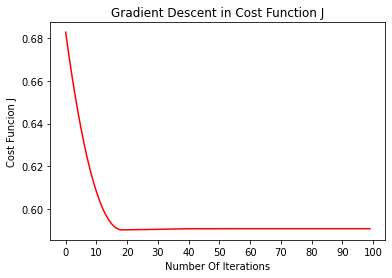

In [13]:
print("The Trend in Cost Function with Number of Iterations")

cost_data = [cache[i][0] for i in range(0, len(cache))]
plt.plot(range(0,len(cost_data)), cost_data, color = 'r')
plt.title("Gradient Descent in Cost Function J");
plt.xlabel("Number Of Iterations");
plt.ylabel("Cost Funcion J")
plt.xticks(range(0,101,10))
plt.show()

In [14]:
i = 1
print("\t\t\t\tCONFUSION MATRIX");

for val in [0.5,0.4,0.3,0.2]:
#for val in np.arange(0.2,0.31,0.01):
    print("\n\n{}) h >= {} is set as 1 else 0\n".format(i, val))

    print("Confusion Matrix of Train Set:");
    confusionMatrix(X_train, theta, y_train, val)
    print("\nConfusion Matrix of Test Set:");
    confusionMatrix(X_test, theta, y_test, val)
    i += 1


				CONFUSION MATRIX


1) h >= 0.5 is set as 1 else 0

Confusion Matrix of Train Set:
TP =  10 	 FP =  1 		 Correct Predictions   (TP+TN) =  423
FN =  244 	 TN =  413 		 Incorrect Predictions (FP+FN) =  245

    1.Accuracy  = 63.32 
    2.F1 Score  = 7.55 
    3.Precision = 90.91 
    4.Recall    = 3.94 

Confusion Matrix of Test Set:
TP =  3 	 FP =  1 		 Correct Predictions   (TP+TN) =  137
FN =  85 	 TN =  134 		 Incorrect Predictions (FP+FN) =  86

    1.Accuracy  = 61.43 
    2.F1 Score  = 6.52 
    3.Precision = 75.00 
    4.Recall    = 3.41 


2) h >= 0.4 is set as 1 else 0

Confusion Matrix of Train Set:
TP =  80 	 FP =  23 		 Correct Predictions   (TP+TN) =  471
FN =  174 	 TN =  391 		 Incorrect Predictions (FP+FN) =  197

    1.Accuracy  = 70.51 
    2.F1 Score  = 44.82 
    3.Precision = 77.67 
    4.Recall    = 31.50 

Confusion Matrix of Test Set:
TP =  30 	 FP =  9 		 Correct Predictions   (TP+TN) =  156
FN =  58 	 TN =  126 		 Incorrect Predictions (FP+FN) =  67

    1.A

#### Analysis,

1 For h >= 0.5, 

    a] Of the 659 examples(FN+TN) in Train Set declared as 0, approximately 246 were pred = 0, actual = 1. Hence the recall was very low.
    b] The Precision was high since very few values had h(x) = 1
    c] The Accuracy was quite low.

2 For h >= 0.3,

    a] Good Accuracy, best among all the options.
    b] It has high Precision as well as high Recall 
    
3 For h >= 0.2,

    a] Of the 480 examples(TP+FP) in Train Set declared as 1, approximately 245 were pred = 1, actual = 0. Hence the precision was very low.
    b] The Recall was high since very few values had h(x) = 0

### Hence, from the above analysis, we can conclude that h >= 0.3 is the best value for h(x).



### Model               : Logistic Regression
#### 1] Functions          : Sigmoid function, Stochastic Gradient Descent.
#### 2] Evaluation Metrics : Confusion Matrix, Accuracy, Precision, Recall. 
#### 3] Parameters         : alpha = 0.1, number of iterations = 100, lambda = 0.01 

#### 4] Accuracy of Model  = 80.09 %
#### 5] Precision of Model = 73.18 %
#### 6] Recall of Model    = 75.20 %

A model has been prepared based on the train dataset provided. It will now be tested on the test dataset.

In [15]:
# Or Prediction of all Test Dataset
print("\nThe Prediction Model for all Passengers of Test Dataset")

Xtest = df_test.values
#Xtest = np.c_[np.ones((Xtest.shape[0], 1)), Xtest]
y_prediction = hypo_y(Xtest, theta)
y_prediction = softmax(y_prediction)

df_pred = pd.read_csv("test.csv")
df_pred["Survived"] = y_prediction

pd.set_option("display.max_rows", 332)
display(df_pred)


The Prediction Model for all Passengers of Test Dataset


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,0
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,1
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,0


The survival of the passengers in test dataset has been appended to the test dataset.